In [1]:
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import scipy.io
import sys
sys.path.insert(0,'..')
from analysis.summary_parallel import *
from analysis.analysis_utils import *
%matplotlib inline

## Load data

In [2]:
my_data = np.load('../data/phase_order_model.npy')
pltcolors, pltcolors_alt = steffiscolours()
perms= np.array([[3,1,2],[1,3,2],[3,2,1],[2,3,1],[1,2,3],[2,1,3]])
num_N= len(my_data)
print("data length = " + str(num_N))

data length = 11593


## Compare predictions of data to permutation

In [11]:
num_correct=0
for dat in my_data:
    if np.isclose(dat[0],get_phase_order(dat[1],dat[2])[0]):
        #print(dat[0],get_phase_order(dat[1],dat[2])[0])
        num_correct+=1
pred = num_correct/num_N
print("perc. correct = " + str(pred))

perc. correct = 0.5681014405244544


In [13]:
%%time

do_analysis=False
if do_analysis:



    #1000 iterations take an hour. Wall time: 1h 16min

    number_permutations=1000
    scores = []
    sh_data=np.copy(my_data)
    for perm in range(number_permutations):
        num_correct=0
        sh_ind1=np.random.rand(num_N).argsort()
        sh_data[:,1]=sh_data[sh_ind1,1]
        
        sh_ind2=np.random.rand(num_N).argsort()
        sh_data[:,2]=sh_data[sh_ind2,2]

        for dat in sh_data:
            if np.isclose(dat[0],get_phase_order(dat[1],dat[2])[0]):
                #print(dat[0],get_phase_order(dat[1],dat[2])[0])
                num_correct+=1
        print("perm " +str(perm) + " perc. correct = " + str(num_correct/num_N))
        scores.append(num_correct/num_N)
    scores = np.array(scores)
    np.save("../data/permuted_data.npy", scores)
else:
    scores=np.load("../data/permuted_data.npy")

CPU times: user 543 µs, sys: 439 µs, total: 982 µs
Wall time: 615 µs


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


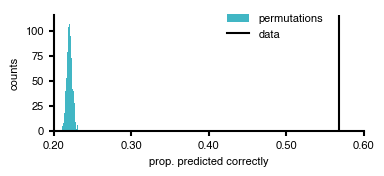

In [26]:
with mpl.rc_context(fname="matplotlibrc"):
    plt.figure(figsize = (4,1.5))
    plt.hist(np.array(scores), bins = 24, color = pltcolors_alt[1], label ='permutations')
    plt.axvline(pred, color ='black', label ='data')
    plt.ylabel("counts")
    plt.xlabel("prop. predicted correctly")
    #plt.xticks(np.arange(0,4/12,1/12), 
    #           labels = ["{:.2f}".format(np.arange(0,4/12,1/12)[i]) for i in range(len(np.arange(0,4/12,1/12)))])
    plt.legend(bbox_to_anchor = (0.9,1.1))
    #plt.savefig("../figures/pred.png", facecolor = 'white')
    #plt.savefig("../figures/phase_order_pred.eps")

    plt.xticks(np.arange(.2,.61,.1), 
               labels = ["{:.2f}".format(np.arange(.2,.61,.1)[i]) for i in range(5)])
    plt.savefig("../figures/model_perm.pdf")
    plt.xlim(0.2,.6)

In [42]:
pred

0.5681014405244544

In [54]:
from matplotlib import gridspec


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


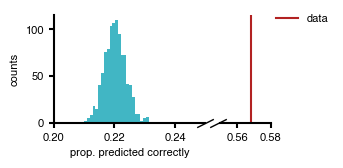

In [80]:
with mpl.rc_context(fname="matplotlibrc"):
    fig = plt.figure(figsize = (2.8,1.4))
    spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[3, 1], wspace=0.15,
                         hspace=0.5)
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])

    ax1.hist(np.array(scores), bins = 24, color = pltcolors_alt[1], label ='permutations')
    ax2.axvline(pred, color ='firebrick', label ='data')
    ax1.set_ylabel("counts")
    ax1.set_xlabel("prop. predicted correctly")
    #plt.xticks(np.arange(0,4/12,1/12), 
    #           labels = ["{:.2f}".format(np.arange(0,4/12,1/12)[i]) for i in range(len(np.arange(0,4/12,1/12)))])
    plt.legend(bbox_to_anchor = (0.9,1.1))
    #plt.savefig("../figures/pred.png", facecolor = 'white')
    #plt.savefig("../figures/phase_order_pred.eps")
    ax2.spines.left.set_visible(False)
    ax2.set_xlim(.55,.58)
    ax2.set_yticks([])
    #ax1.set_xticks(np.arange(0,4/12,1/12), 
    #           labels = ["{:.2f}".format(np.arange(0,4/12,1/12)[i]) for i in range(len(np.arange(0,4/12,1/12)))])
    ax1.set_xlim(0.2,0.25)
    ax1.set_xticks([0.2,0.22,0.24])
    ax2.set_xticks([0.56,0.58])

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([1],[0], transform=ax1.transAxes, **kwargs)
    ax2.plot([-.05], [0], transform=ax2.transAxes, **kwargs)
    plt.savefig("../figures/model_perm.pdf")


In [ ]:
Shuffle either

In [ ]:
%%time

#1000 iterations take an hour. Wall time: 1h 16min

number_permutations=1000
scores = []
sh_data=np.copy(my_data)
for perm in range(number_permutations):
    num_correct=0
    sh_ind=np.random.rand(num_N).argsort()
    sh_data[:,1]=sh_data[sh_ind,1]
    for dat in sh_data:
        if np.isclose(dat[0],get_phase_order(dat[1],dat[2])[0]):
            #print(dat[0],get_phase_order(dat[1],dat[2])[0])
            num_correct+=1
    print("perm " +str(perm) + " perc. correct = " + str(num_correct/num_N))
    scores.append(num_correct/num_N)

perm 0 perc. correct = 0.24859829207280254
perm 1 perc. correct = 0.2529112395411024
perm 2 perc. correct = 0.25351505218666437
perm 3 perc. correct = 0.2545501595790563
perm 4 perc. correct = 0.25644785646510826
perm 5 perc. correct = 0.2566203743638403
perm 6 perc. correct = 0.2517898731993444
perm 7 perc. correct = 0.24566548779435868
perm 8 perc. correct = 0.2503234710601225
perm 9 perc. correct = 0.24851203312343656
perm 10 perc. correct = 0.24842577417407055
perm 11 perc. correct = 0.24790822047787459
perm 12 perc. correct = 0.25601656171827825
perm 13 perc. correct = 0.25403260588286036
perm 14 perc. correct = 0.2526524626930044
perm 15 perc. correct = 0.25144483740188045
perm 16 perc. correct = 0.2523074268955404
perm 17 perc. correct = 0.2534287932372984
perm 18 perc. correct = 0.24592426464245665
perm 19 perc. correct = 0.24635555938928663
perm 20 perc. correct = 0.24566548779435868
perm 21 perc. correct = 0.2498921763132925
perm 22 perc. correct = 0.2544639006296903
perm 23 

In [ ]:
%%time
#1000 iterations take an hour. Wall time: 1h 16min

number_permutations=1000
scores_ISIshuff = []
sh_data=np.copy(my_data)
for perm in range(number_permutations):
    num_correct=0
    sh_ind=np.random.rand(num_N).argsort()
    sh_data[:,2]=sh_data[sh_ind,2]
    for dat in sh_data:
        if np.isclose(dat[0],get_phase_order(dat[1],dat[2])[0]):
            #print(dat[0],get_phase_order(dat[1],dat[2])[0])
            num_correct+=1
    print("perm " +str(perm) + " perc. correct = " + str(num_correct/num_N))
    scores_ISIshuff.append(num_correct/num_N)

perm 0 perc. correct = 0.237039592857759
perm 1 perc. correct = 0.24549296989562666
perm 2 perc. correct = 0.2524799447942724
perm 3 perc. correct = 0.23962736133873888
perm 4 perc. correct = 0.24532045199689467
perm 5 perc. correct = 0.2427326835159148
perm 6 perc. correct = 0.2444578625032347
perm 7 perc. correct = 0.2415250582247908
perm 8 perc. correct = 0.24756318468041058
perm 9 perc. correct = 0.2452341930475287
perm 10 perc. correct = 0.24350901406020875
perm 11 perc. correct = 0.2474769257310446
perm 12 perc. correct = 0.2442853446045027
perm 13 perc. correct = 0.2501509531613905
perm 14 perc. correct = 0.24014491503493487
perm 15 perc. correct = 0.2472181488829466
perm 16 perc. correct = 0.24256016561718277
perm 17 perc. correct = 0.24790822047787459
perm 18 perc. correct = 0.2392823255412749
perm 19 perc. correct = 0.25153109635124643
perm 20 perc. correct = 0.23669455706029502
perm 21 perc. correct = 0.23919606659190892
perm 22 perc. correct = 0.24048995083239885
perm 23 pe

perm 186 perc. correct = 0.24661433623738463
perm 187 perc. correct = 0.24437160355386872
perm 188 perc. correct = 0.2427326835159148
perm 189 perc. correct = 0.24670059518675064
perm 190 perc. correct = 0.24057620978176486
perm 191 perc. correct = 0.23574570861726904
perm 192 perc. correct = 0.23798844130078495
perm 193 perc. correct = 0.2420426119209868
perm 194 perc. correct = 0.25092728370568446
perm 195 perc. correct = 0.24687311308548263
perm 196 perc. correct = 0.24333649616147676
perm 197 perc. correct = 0.24161131717415682
perm 198 perc. correct = 0.24877080997153456
perm 199 perc. correct = 0.2427326835159148
perm 200 perc. correct = 0.2449754161994307
perm 201 perc. correct = 0.24290520141464678
perm 202 perc. correct = 0.23548693176917104
perm 203 perc. correct = 0.24023117398430088
perm 204 perc. correct = 0.24678685413611662
perm 205 perc. correct = 0.24808073837660657
perm 206 perc. correct = 0.24419908565513673
perm 207 perc. correct = 0.24394030880703874
perm 208 perc.

perm 370 perc. correct = 0.24609678254118864
perm 371 perc. correct = 0.24212887087035279
perm 372 perc. correct = 0.24678685413611662
perm 373 perc. correct = 0.24540671094626068
perm 374 perc. correct = 0.23755714655395496
perm 375 perc. correct = 0.24066246873113087
perm 376 perc. correct = 0.23747088760458898
perm 377 perc. correct = 0.2448891572500647
perm 378 perc. correct = 0.2393685844906409
perm 379 perc. correct = 0.2448028983006987
perm 380 perc. correct = 0.24187009402225482
perm 381 perc. correct = 0.24342275511084274
perm 382 perc. correct = 0.23885103079444492
perm 383 perc. correct = 0.24023117398430088
perm 384 perc. correct = 0.24031743293366686
perm 385 perc. correct = 0.2494608815664625
perm 386 perc. correct = 0.2444578625032347
perm 387 perc. correct = 0.24100750452859485
perm 388 perc. correct = 0.24644181833865264
perm 389 perc. correct = 0.24299146036401276
perm 390 perc. correct = 0.2399723971362029
perm 391 perc. correct = 0.2424739066678168
perm 392 perc. co

perm 554 perc. correct = 0.24583800569309067
perm 555 perc. correct = 0.2449754161994307
perm 556 perc. correct = 0.2424739066678168
perm 557 perc. correct = 0.237039592857759
perm 558 perc. correct = 0.23816095919951694
perm 559 perc. correct = 0.2393685844906409
perm 560 perc. correct = 0.2419563529716208
perm 561 perc. correct = 0.23195031484516518
perm 562 perc. correct = 0.24109376347796083
perm 563 perc. correct = 0.2420426119209868
perm 564 perc. correct = 0.24126628137669284
perm 565 perc. correct = 0.24169757612352283
perm 566 perc. correct = 0.24040369188303287
perm 567 perc. correct = 0.24868455102216855
perm 568 perc. correct = 0.24618304149055464
perm 569 perc. correct = 0.2397136202881049
perm 570 perc. correct = 0.2390235486931769
perm 571 perc. correct = 0.24368153195894074
perm 572 perc. correct = 0.23885103079444492
perm 573 perc. correct = 0.24937462261709653
perm 574 perc. correct = 0.24825325627533856
perm 575 perc. correct = 0.2417838350728888
perm 576 perc. corre

perm 738 perc. correct = 0.2499784352626585
perm 739 perc. correct = 0.2415250582247908
perm 740 perc. correct = 0.24868455102216855
perm 741 perc. correct = 0.24256016561718277
perm 742 perc. correct = 0.24557922884499267
perm 743 perc. correct = 0.2448028983006987
perm 744 perc. correct = 0.23790218235141897
perm 745 perc. correct = 0.23738462865522297
perm 746 perc. correct = 0.2393685844906409
perm 747 perc. correct = 0.2448028983006987
perm 748 perc. correct = 0.24118002242732683
perm 749 perc. correct = 0.2449754161994307
perm 750 perc. correct = 0.2448891572500647
perm 751 perc. correct = 0.24825325627533856
perm 752 perc. correct = 0.24532045199689467
perm 753 perc. correct = 0.24368153195894074
perm 754 perc. correct = 0.23988613818683688
perm 755 perc. correct = 0.24859829207280254
perm 756 perc. correct = 0.23841973604761493
perm 757 perc. correct = 0.2395411023893729
perm 758 perc. correct = 0.24118002242732683
perm 759 perc. correct = 0.2452341930475287
perm 760 perc. corr

perm 922 perc. correct = 0.24980591736392652
perm 923 perc. correct = 0.24066246873113087
perm 924 perc. correct = 0.23833347709824895
perm 925 perc. correct = 0.236953333908393
perm 926 perc. correct = 0.24325023721211075
perm 927 perc. correct = 0.24256016561718277
perm 928 perc. correct = 0.24359527300957473
perm 929 perc. correct = 0.24048995083239885
perm 930 perc. correct = 0.24394030880703874
perm 931 perc. correct = 0.24575174674372466
perm 932 perc. correct = 0.2471318899335806
perm 933 perc. correct = 0.24411282670577072
perm 934 perc. correct = 0.22849995687052532
perm 935 perc. correct = 0.2394548434400069
perm 936 perc. correct = 0.2448028983006987
perm 937 perc. correct = 0.24782196152850858
perm 938 perc. correct = 0.23764340550332097
perm 939 perc. correct = 0.23798844130078495
perm 940 perc. correct = 0.2446303804019667
perm 941 perc. correct = 0.24902958681963253
perm 942 perc. correct = 0.23919606659190892
perm 943 perc. correct = 0.24532045199689467
perm 944 perc. c

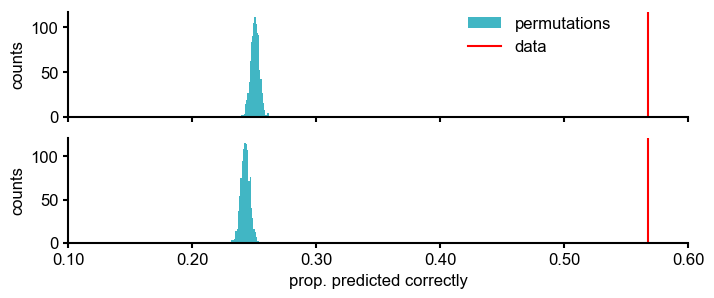

In [ ]:
with mpl.rc_context(fname="matplotlibrc"):
    fig,ax=plt.subplots(2,figsize = (8,3))
    ax[0].hist(np.array(scores), bins = 24, color = pltcolors_alt[1], label ='permutations')
    ax[0].axvline(pred, color ='red', label ='data')
    ax[1].hist(np.array(scores_ISIshuff), bins = 24, color = pltcolors_alt[1], label ='permutations')
    ax[1].axvline(pred, color ='red', label ='data')
    ax[0].set_ylabel("counts")
    ax[1].set_ylabel("counts")

    ax[1].set_xlabel("prop. predicted correctly")
    ax[0].set_xticks(np.arange(.1,.61,.1), 
               labels = [])
    ax[1].set_xticks(np.arange(.1,.61,.1), 
               labels = ["{:.2f}".format(np.arange(.1,.61,.1)[i]) for i in range(6)])
    ax[0].legend(bbox_to_anchor = (0.9,1.1))
    plt.savefig("../figures/pred.png", facecolor = 'white')
    #plt.savefig("../figures/phase_order_pred.eps")